# 5 Things to Know Before Becoming a Data Scientist 

This notebook contains the analytics for the ways to get started with as a data scientist. Stack Overflow is an online technology forum that has a large monthly active user base, using the survey results could find out the insights of the general software engineer, and especially the data scientist community.

**Import packages**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os
from matplotlib.ticker import FuncFormatter

%matplotlib inline

**Data Preparation**

Load stack overflow survey data from 2015 to 2019, and preprocess the data.

In [5]:
path = "./data"
os.chdir(path)

df_2019=pd.read_csv('2019.csv')
df_2018=pd.read_csv('2018.csv',engine='python', encoding= 'latin1')
df_2017=pd.read_csv('2017.csv')
df_2016=pd.read_csv('2016.csv')
df_2015=pd.read_csv('2015.csv')



/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_2019['Year']=2019
df_2018['Year']=2018
df_2017['Year']=2017
df_2016['Year']=2016
df_2015['Year']=2015

As the column names in each survey file are a bit different, here we need to rename those columns of interests.

In [7]:
df_2018.drop(['Salary'],axis=1,inplace=True)

df_2019.rename(columns={'DevType':'Occupation', 'ConvertedComp' : 'Salary'}, inplace = True)
df_2018.rename(columns={'DevType':'Occupation', 'ConvertedSalary' : 'Salary'}, inplace = True)
df_2017.rename(columns={'DeveloperType':'Occupation'}, inplace = True)
df_2016.rename(columns={'occupation':'Occupation', 'salary_midpoint' : 'Salary', 'gender': 'Gender', 'country':'Country'}, inplace = True)
df_2015.rename(columns={ 'Compensation: midpoint' : 'Salary'}, inplace = True)

df_2019['Gender'] = df_2019['Gender'].map({'Woman':'Female', 'Man': 'Male' })

**Data Scientists Community Growth**

Extract data scientists' survey data from the dataframes and store them in ds_yyyy dataframes.

In [8]:
ds_2015=df_2015[df_2015['Occupation'].str.contains('.*ata scientist|achine|earning', na = False)]
ds_2016=df_2016[df_2016['Occupation'].str.contains('.*ata scientist|achine|earning', na = False)]
ds_2017=df_2017[df_2017['Occupation'].str.contains('.*ata scientist|achine|earning', na = False)]
ds_2018=df_2018[df_2018['Occupation'].str.contains('.*ata scientist|achine|earning', na = False)]
ds_2019=df_2019[df_2019['Occupation'].str.contains('.*ata scientist|achine|earning', na = False)]


Plot % of data scientists. Missing data here is counted as other / non-data scientist developers.

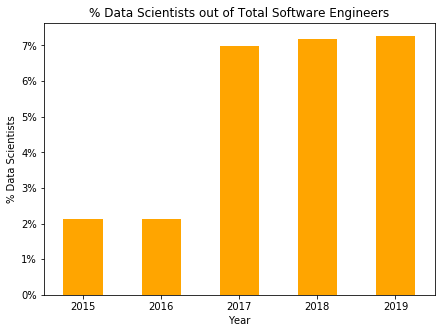

In [9]:
ds_occupation=pd.concat([ds_2015[['Occupation','Year']],ds_2016[['Occupation','Year']],ds_2017[['Occupation','Year']],ds_2018[['Occupation','Year']],ds_2019[['Occupation','Year']]])
all_occupation=pd.concat([df_2015[['Occupation','Year']],df_2016[['Occupation','Year']],df_2017[['Occupation','Year']],df_2018[['Occupation','Year']],df_2019[['Occupation','Year']]]).fillna(value='Other')
ds_occupation=ds_occupation.groupby(['Year'])['Occupation'].agg('count')
all_occupation=all_occupation.groupby(['Year'])['Occupation'].agg('count')



plt.style.use('seaborn-colorblind')
plt.figure(figsize=(7,5))
ax =(ds_occupation/all_occupation * 100).plot(kind='bar',color = ('orange'))


plt.xlabel('Year')
plt.ylabel('% Data Scientists')
plt.xticks(rotation = 0)
plt.title("% Data Scientists out of Total Software Engineers")
plt.gca().set_yticklabels(['{:,.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
plt.show()


It looks like that the data scientists community had a spike from 2016 to 2017, and has been steadly increase after 2017.

It is commonly known that the there's an inbalance of gender ratio in IT and Computer Science related areas. I am wondering how is the proportion of female data scientists compared to that of developers in general. 

Extract female data scientists and female developers data and store them in new dataframes.

In [11]:
ds_female_2015=ds_2015[ds_2015['Gender']=='Female']
ds_female_2016=ds_2016[ds_2016['Gender']=='Female']
ds_female_2017=ds_2017[ds_2017['Gender']=='Female']
ds_female_2018=ds_2018[ds_2018['Gender']=='Female']
ds_female_2019=ds_2019[ds_2019['Gender']=='Female']

all_female_2015=df_2015[df_2015['Gender']=='Female']
all_female_2016=df_2016[df_2016['Gender']=='Female']
all_female_2017=df_2017[df_2017['Gender']=='Female']
all_female_2018=df_2018[df_2018['Gender']=='Female']
all_female_2019=df_2019[df_2019['Gender']=='Female']


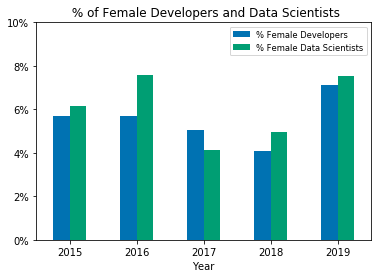

In [12]:

ds_female=pd.concat([ds_female_2015[['Year','Gender']],ds_female_2016[['Year','Gender']],ds_female_2017[['Year','Gender']],ds_female_2018[['Year','Gender']],ds_female_2019[['Year','Gender']]])
ds_female=ds_female.groupby(['Year'])['Gender'].agg('count')
all_female=pd.concat([all_female_2015[['Year','Gender']],all_female_2016[['Year','Gender']],all_female_2017[['Year','Gender']],all_female_2018[['Year','Gender']],all_female_2019[['Year','Gender']]])
all_female=all_female.groupby(['Year'])['Gender'].agg('count')

female_dev_percentage=all_female/all_occupation
female_ds_percentage=ds_female/ds_occupation

plt.style.use('seaborn-colorblind')
female_ratio=pd.concat([female_dev_percentage,female_ds_percentage],axis=1)
female_ratio.columns=(['% Female Developers','% Female Data Scientists'])
female_ratio.plot(kind='bar')
plt.legend(fontsize='small')
plt.ylim(0,.1)
plt.xticks(rotation=0)
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.title(' % of Female Developers and Data Scientists')
plt.show()

It looks like that there are higher ratio of female data scientists compared of that of developers in general. 

**How are Data Scientists paid compared to all developers?**



Salary , Data Scientists vs. Software Engineers by Year

Drop string and num values from Salary columns.

In [13]:

ds_2015['Salary'] = pd.to_numeric(ds_2015['Salary'], errors='coerce').dropna()
ds_2016['Salary'] = pd.to_numeric(ds_2016['Salary'], errors='coerce').dropna()
ds_2017['Salary'] = pd.to_numeric(ds_2017['Salary'], errors='coerce').dropna()
ds_2018['Salary'] = pd.to_numeric(ds_2018['Salary'], errors='coerce').dropna()
ds_2019['Salary'] = pd.to_numeric(ds_2019['Salary'], errors='coerce').dropna()


df_2015['Salary'] = pd.to_numeric(df_2015['Salary'], errors='coerce').dropna()
df_2016['Salary'] = pd.to_numeric(df_2016['Salary'], errors='coerce').dropna()
df_2017['Salary'] = pd.to_numeric(df_2017['Salary'], errors='coerce').dropna()
df_2018['Salary'] = pd.to_numeric(df_2018['Salary'], errors='coerce').dropna()
df_2019['Salary'] = pd.to_numeric(df_2019['Salary'], errors='coerce').dropna()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [14]:
ds_us_salary_2015=ds_2015[ds_2015['Country'] == 'United States']
ds_us_salary_2016=ds_2016[ds_2016['Country'] == 'United States']
ds_us_salary_2017=ds_2017[ds_2017['Country'] == 'United States']
ds_us_salary_2018=ds_2018[ds_2018['Country'] == 'United States']
ds_us_salary_2019=ds_2019[ds_2019['Country'] == 'United States']

us_salary_2015=df_2015[df_2015['Country'] == 'United States']
us_salary_2016=df_2016[df_2016['Country'] == 'United States']
us_salary_2017=df_2017[df_2017['Country'] == 'United States']
us_salary_2018=df_2018[df_2018['Country'] == 'United States']
us_salary_2019=df_2019[df_2019['Country'] == 'United States']


ds_us_salary=pd.concat([ds_us_salary_2015[['Salary','Year']],ds_us_salary_2016[['Salary','Year']],ds_us_salary_2017[['Salary','Year']],ds_us_salary_2018[['Salary','Year']],ds_us_salary_2019[['Salary','Year']]])
all_us_salary=pd.concat([us_salary_2015[['Salary','Year']],us_salary_2016[['Salary','Year']],us_salary_2017[['Salary','Year']],us_salary_2018[['Salary','Year']],us_salary_2019[['Salary','Year']]])

ds_us_salary=ds_us_salary.groupby(['Year'])['Salary'].agg('mean')
all_us_salary=all_us_salary.groupby(['Year'])['Salary'].agg('mean')

Plot salary comparisons of data scientists' and all developers' salary both in the World and in the United States.

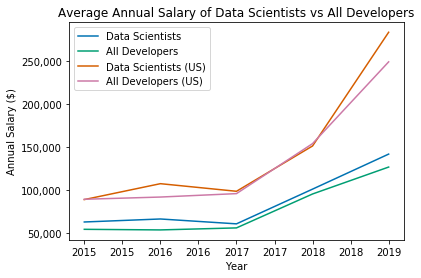

In [12]:

ds_salary=pd.concat([ds_2015[['Salary','Year']],ds_2016[['Salary','Year']],ds_2017[['Salary','Year']],ds_2018[['Salary','Year']],ds_2019[['Salary','Year']]])
all_salary=pd.concat([df_2015[['Salary','Year']],df_2016[['Salary','Year']],df_2017[['Salary','Year']],df_2018[['Salary','Year']],df_2019[['Salary','Year']]]).dropna(subset=['Salary'],how='any')


ds_salary=ds_salary.groupby(['Year'])['Salary'].agg('mean')
all_salary=all_salary.groupby(['Year'])['Salary'].agg('mean')

salary=pd.concat([ds_salary,all_salary,ds_us_salary,all_us_salary],axis=1)
salary.columns = ['Data Scientists', 'All Developers', 'Data Scientists (US)', 'All Developers (US)']

plt.style.use('seaborn-colorblind')
salary.plot(kind='line')
plt.ylabel('Annual Salary ($)')
plt.title('Average Annual Salary of Data Scientists vs All Developers')
plt.gca().set_yticklabels(['{:,.0f}'.format(int(x)) for x in plt.gca().get_yticks()]);
plt.gca().set_xticklabels(['{:}'.format(int(x)) for x in plt.gca().get_xticks()]);


We can see that data scientists are paid better than all developers on average, and both data scientists and other developers earn more money in the United States. 

**What skills need to have to be a data scientist?**


To become a data scientist, we have to understand what are the most important tools data scientists use. 

Here we get the programming luanguage, platform, database, and web frame counts from 2019. Missing data in the technologies are removed. Meanwhile, since one person may know multiple languages/ platforms/databases/web frames at the same time, the long string format of the categorical variable is splitted based on delimiter "," to perform unique counts.

Text(0.5, 1.0, 'Top 10 Most Popular Language for Data Scientist')

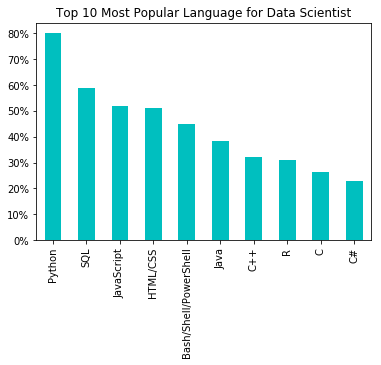

In [13]:

language_2019= ds_2019['LanguageWorkedWith'].str.replace(" ", "").str.split(";", expand=True).stack().reset_index(drop=True, level=1).value_counts()
total_count=ds_2019['LanguageWorkedWith'].dropna(axis=0).count()
total_count
language_2019=language_2019/total_count


language_2019.sort_values(ascending=False).head(10).plot(kind='bar',color=('c','c','c','c','c','c','c','c','c','c'))
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.title('Top 10 Most Popular Language for Data Scientist')


Text(0.5, 1.0, 'Top 10 Most Popular Database for Data Scientist')

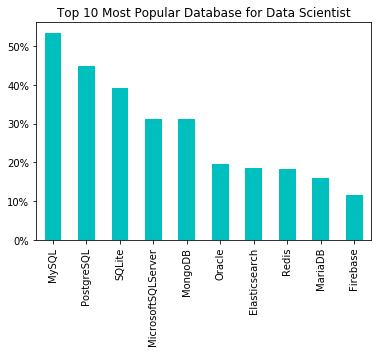

In [14]:
database_2019= ds_2019['DatabaseWorkedWith'].str.replace(" ", "").str.split(";", expand=True).stack().reset_index(drop=True, level=1).value_counts()
total_count=ds_2019['DatabaseWorkedWith'].dropna(axis=0).count()
total_count
database_2019=database_2019/total_count


database_2019.sort_values(ascending=False).head(10).plot(kind='bar',color=('c','c','c','c','c','c','c','c','c','c'))
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.title('Top 10 Most Popular Database for Data Scientist')

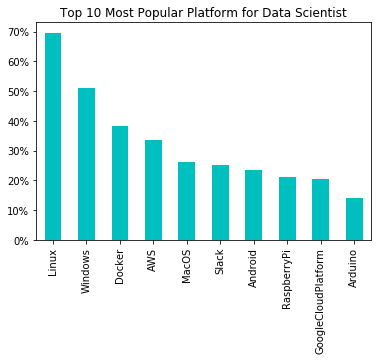

In [16]:
platform_2019= ds_2019['PlatformWorkedWith'].str.replace(" ", "").str.split(";", expand=True).stack().reset_index(drop=True, level=1).value_counts()
total_count=ds_2019['PlatformWorkedWith'].dropna(axis=0).count()
total_count
platform_2019=platform_2019/total_count

platform_2019.sort_values(ascending=False).head(10).plot(kind='bar',color=('c','c','c','c','c','c','c','c','c','c'))
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.title('Top 10 Most Popular Platform for Data Scientist');

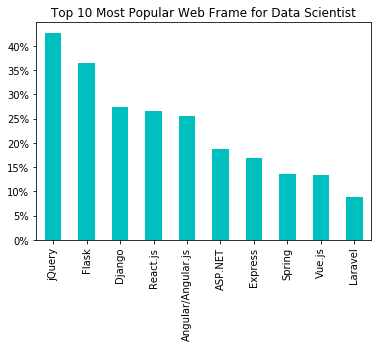

In [17]:
webframe_2019= ds_2019['WebFrameWorkedWith'].str.replace(" ", "").str.split(";", expand=True).stack().reset_index(drop=True, level=1).value_counts()
total_count=ds_2019['WebFrameWorkedWith'].dropna(axis=0).count()
total_count
webframe_2019=webframe_2019/total_count


webframe_2019.sort_values(ascending=False).head(10).plot(kind='bar',color=('c','c','c','c','c','c','c','c','c','c'))
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.title('Top 10 Most Popular Web Frame for Data Scientist');

**Does a data science role return you a happy career?**

Extract the job satisfaction data over the years and store them in new dataframes. Missing data are not included for this analysis. 

In [18]:
satisfication = {}
satisfication['2015'] = ds_2015['Job Satisfaction']
satisfication['2016'] = ds_2016['job_satisfaction']
satisfication['2017'] = pd.cut(ds_2017['CareerSatisfaction'], 
                               bins= 3, labels = ['Dissatisfied', 'Neutral', 'Satisfied'], include_lowest=True)
satisfication['2018'] = ds_2018['CareerSatisfaction']
satisfication['2019'] = ds_2019['CareerSat']


Clean up messy formats. 

In [19]:
cleanup_satisfaction = {}

cleanup_satisfaction['2019'] = {'Neither satisfied nor dissatisfied':'Neutral', 'Slightly dissatisfied': 'Dissatisfied', 'Very dissatisfied' : 'Dissatisfied', 'Slightly satisfied':'Satisfied', 'Very satisfied':'Satisfied'}

cleanup_satisfaction['2018'] = {'Neither satisfied nor dissatisfied':'Neutral', 'Slightly dissatisfied': 'Dissatisfied', 'Extremely dissatisfied' : 'Dissatisfied', 'Slightly satisfied':'Satisfied', 'Extremely satisfied':'Satisfied', 'Moderately dissatisfied':'Dissatisfied','Moderately satisfied' : 'Satisfied'}


cleanup_satisfaction['2016'] = {"I'm somewhat satisfied with my job": "Satisfied", 
                              "I love my job": "Satisfied",
                              "I'm neither satisfied nor dissatisfied": "Neutral", 
                              "I hate my job": "Dissatisfied",
                              "I'm somewhat dissatisfied with my job": "Dissatisfied"
                             }

cleanup_satisfaction['2015'] = {"I'm somewhat dissatisfied with my job": "Satisfied", 
                              "I love my job": "Satisfied",
                              "I'm neither satisfied nor dissatisfied with my job": "Neutral", 
                              "I hate my job": "Dissatisfied",
                              "Other (please specify)" : "Neutral",
                              "I'm somewhat dissatisfied with my job": "Dissatisfied",
                              "I'm somewhat satisfied with my job": 'Satisfied'
                             }

for i in cleanup_satisfaction:
    satisfication[i] = satisfication[i].map(cleanup_satisfaction[i])
    

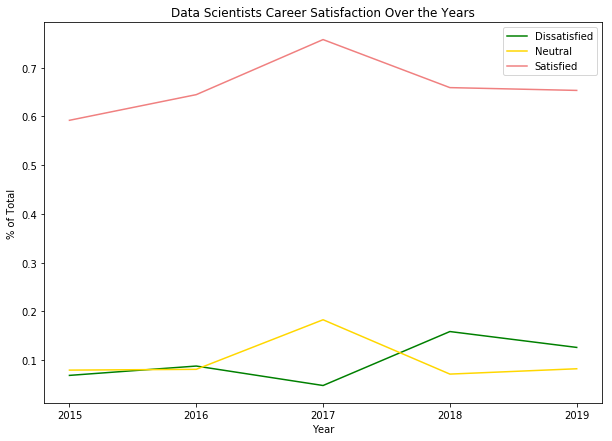

In [20]:
satisfication_counts = pd.DataFrame.from_dict({i: satisfication[i].value_counts()/len(satisfication[i])
                                               for i in satisfication})

colors = ['green', 'gold', 'lightcoral']
plt.figure(figsize = (10, 7))
j = 0
for i in list(satisfication_counts.T.columns):
    plt.plot(satisfication_counts.T.loc[:, i], label = i, color = colors[j])
    j += 1
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.legend()
plt.title("Data Scientists Career Satisfaction Over the Years")
plt.show()

It seems that more than half of the data scientists are very happy with their career.

**How many hours data scientists work weekly?**

Plot data scientists hours spent on computers weekly in 2019, and compare it to those of all developers. 

Missing values in the weekly work hours column has been removed. Additionally, any extremely high values are not included in this analysis (i.e. 400 weekly hours does not seem true as there is only 168 hours in total for a week). 


In [22]:
ds_work_hrs=ds_2019['WorkWeekHrs'].loc[((ds_2019['WorkWeekHrs'] <= 168 ) & (ds_2019['WorkWeekHrs']))].dropna()
all_work_hrs=df_2019['WorkWeekHrs'].loc[(df_2019['WorkWeekHrs'] <= 168)].dropna()


Breaking the working hours per week into ranges.

In [33]:
def hr_range(i):
        if i <= 20:
            x = ('0-20')
        elif (i <= 40 and i >20):
            x = ('20-40')
        elif (i <= 50 and i > 40):
            x = ('40-50')
        elif (i <= 60 and i > 50):
            x = ('50-60')
        else:
            x = ('>60')
        return x

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


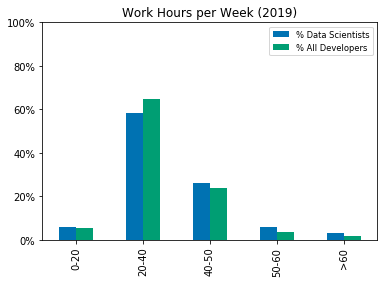

In [34]:
ds_hrs=ds_work_hrs.apply(hr_range)
all_hrs=all_work_hrs.apply(hr_range)

ds_hrs=ds_hrs.value_counts()/len(ds_hrs)
all_hrs=all_hrs.value_counts()/len(all_hrs)

plt.style.use('seaborn-colorblind')

hrs_wk=pd.concat([ds_hrs,all_hrs],axis=1)
hrs_wk.columns=(['% Data Scientists','% All Developers'])
hrs_wk.plot(kind='bar')


plt.legend(fontsize='small')
plt.ylim(0,1)
plt.xlabel
plt.gca().set_yticklabels(['{:,.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.title('Work Hours per Week (2019)')
plt.show()

Most developers and data scientists work kess than 50 hours per week, which looks common for most careers. 